<a href="https://colab.research.google.com/github/richardtekere09/Machine_Learning_labs/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Data_Set_A_B.xlsx to Data_Set_A_B (7).xlsx
Saving Data_Set_C.xlsx to Data_Set_C (7).xlsx
X Prediction - Mean Absolute Error: 2.595435755384369
X Prediction - Maximum Error: 17.12503730485664
Y Prediction - Mean Absolute Error: 2.794923727023751
Y Prediction - Maximum Error: 13.065998465012289


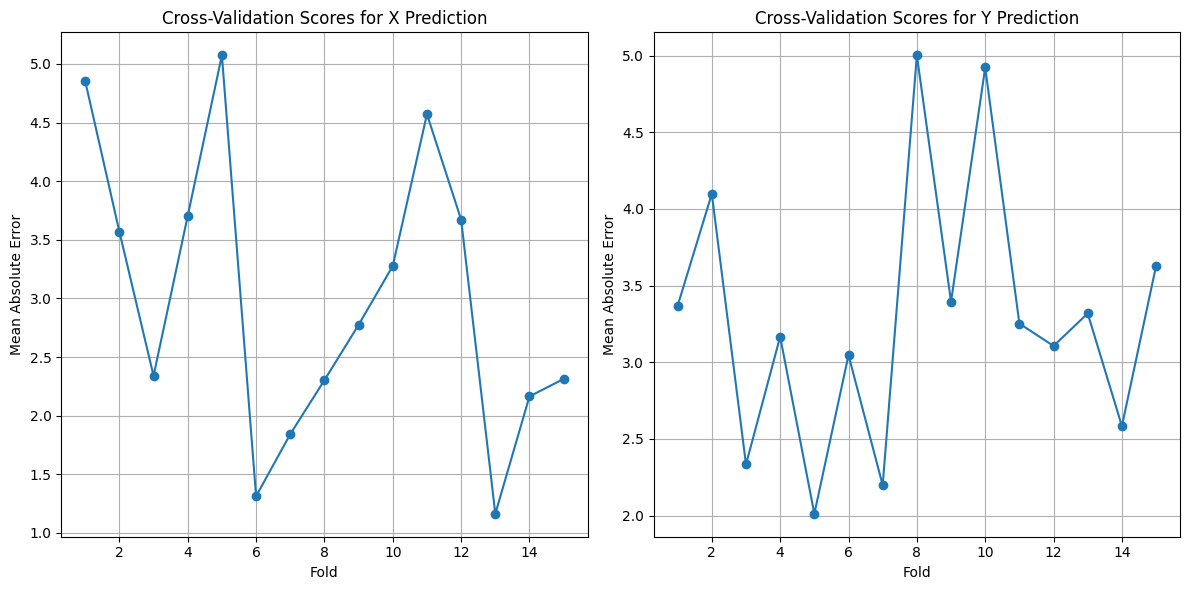

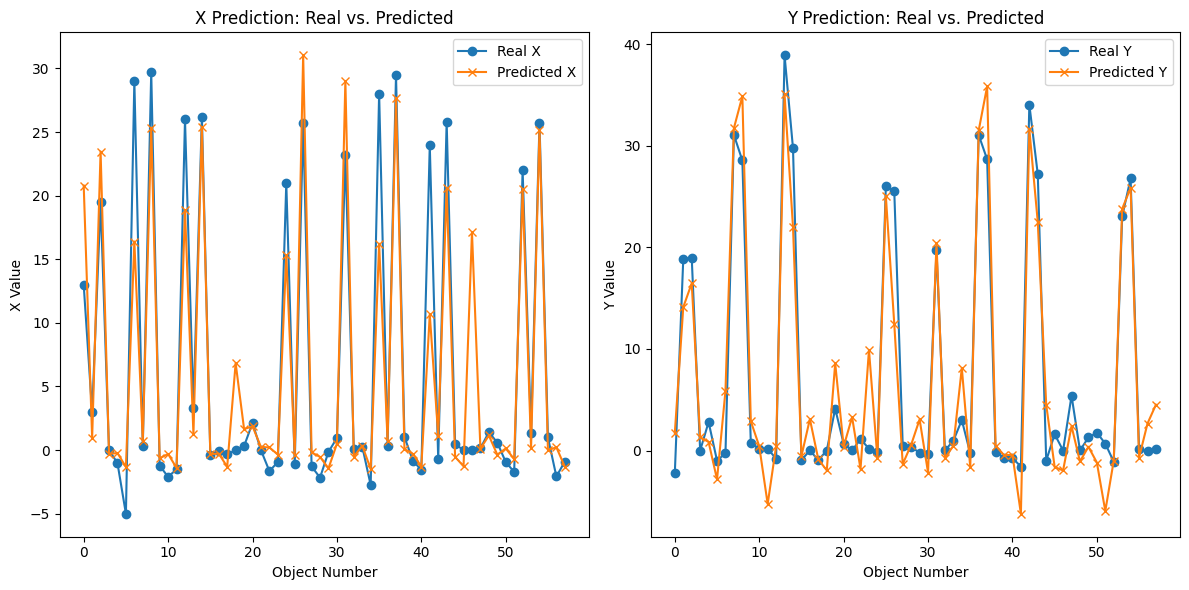

Y Prediction - Cross-Validation Mean Absolute Error: 3.439123042744174
Y Prediction - Cross-Validation Maximum Error: 2.111085376797208
X Prediction - Mean Absolute Error: 2.595435755384369
X Prediction - Maximum Error: 17.12503730485664
Y Prediction - Mean Absolute Error: 2.794923727023751
Y Prediction - Maximum Error: 13.065998465012289


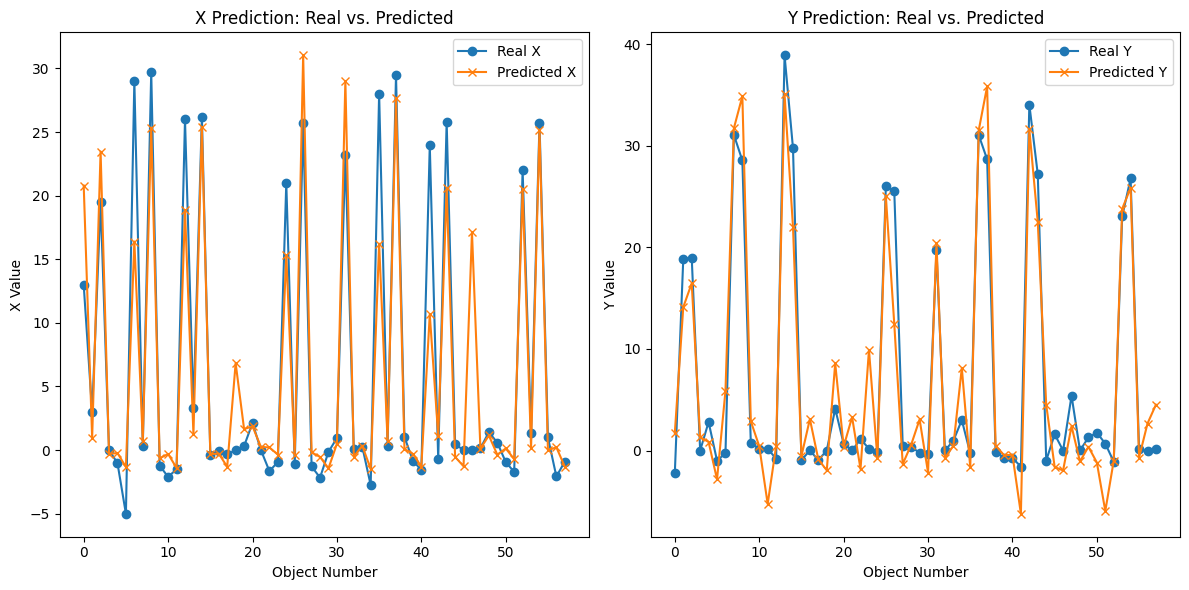

Saving Data_Set_A_B.xlsx to Data_Set_A_B (8).xlsx
Saving Data_Set_C.xlsx to Data_Set_C (8).xlsx
X Prediction - Mean Absolute Error: 2.595435755384369
X Prediction - Maximum Error: 17.12503730485664
Y Prediction - Mean Absolute Error: 2.794923727023751
Y Prediction - Maximum Error: 13.065998465012289


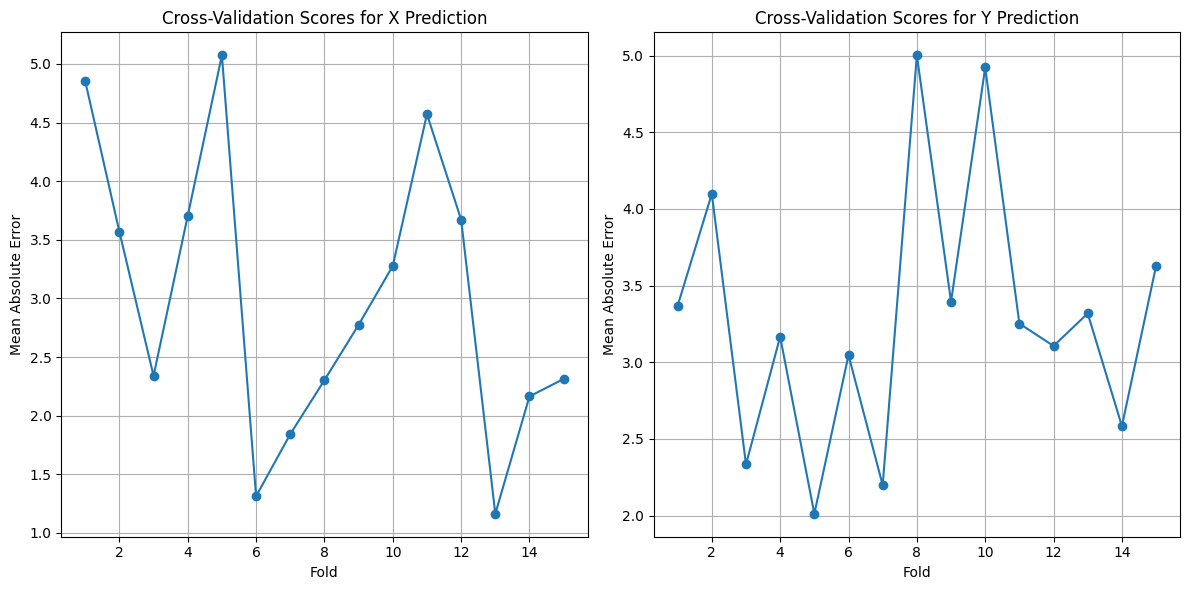

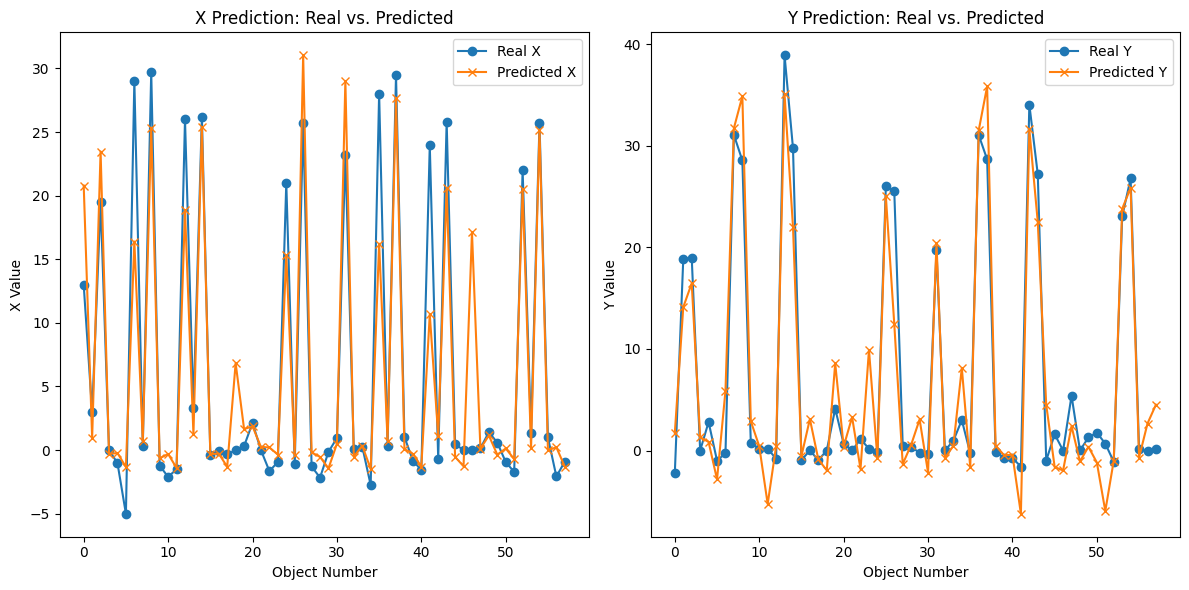

Y Prediction - Cross-Validation Mean Absolute Error: 3.439123042744174
Y Prediction - Cross-Validation Maximum Error: 2.111085376797208
X Prediction - Mean Absolute Error: 2.595435755384369
X Prediction - Maximum Error: 17.12503730485664
Y Prediction - Mean Absolute Error: 2.794923727023751
Y Prediction - Maximum Error: 13.065998465012289


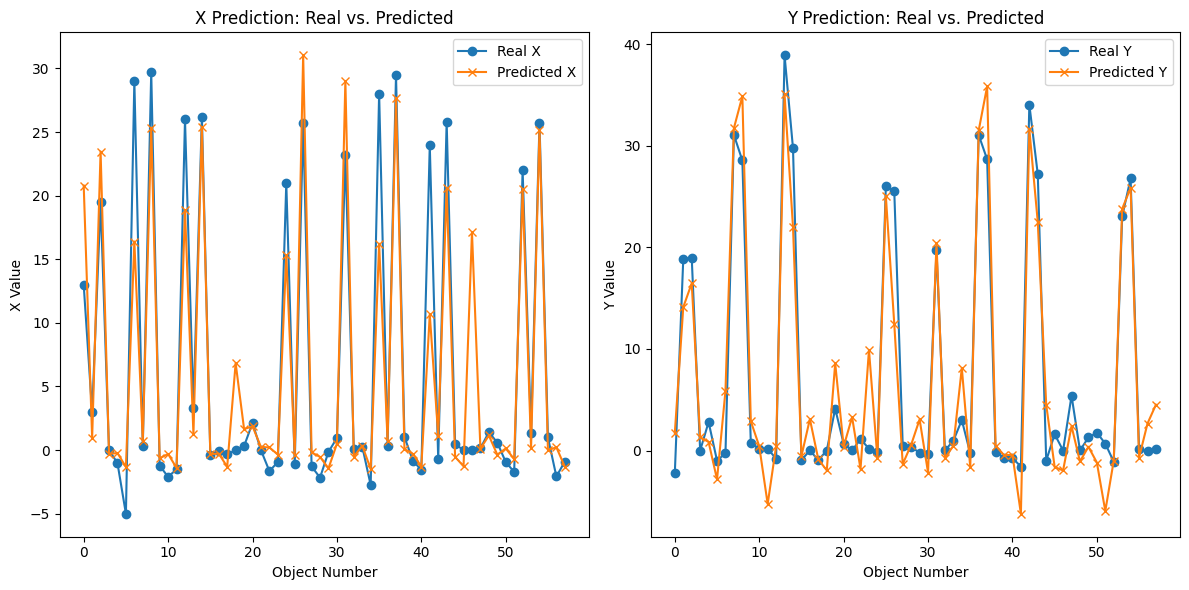

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, max_error
from sklearn.model_selection import cross_val_score
from google.colab import files

uploaded = files.upload()

# Load training dataset (A+B)
train_data = pd.read_excel('Data_Set_A_B.xlsx')

# Load testing dataset (C)
test_data = pd.read_excel('Data_Set_C.xlsx')

# Define the subsets of input variables and output values
# Subset 1: {N}
X1_train = train_data[['N1', 'N2', 'N3']]
y1_train = train_data['X']  # Assuming 'X' is the column name for X

X2_train = train_data[['N1', 'N2', 'N3', 'I1', 'I2', 'I3', 'ax', 'ay', 'az']]
y2_train = train_data['Y']  # Assuming 'Y' is the column name for Y

# Subset 3: {N} for testing
X1_test = test_data[['N1', 'N2', 'N3']]
y1_test = test_data['X']

X2_test = test_data[['N1', 'N2', 'N3', 'I1', 'I2', 'I3', 'ax', 'ay', 'az']]
y2_test = test_data['Y']

# Normalize the data (optional but often recommended for neural networks)
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

# Create and train neural networks
# Network for X prediction
model_x = MLPRegressor(hidden_layer_sizes=(15, 15, 15), activation='relu', solver='adam', max_iter=100000, alpha=0.0001, random_state=0)
model_x.fit(X1_train_scaled, y1_train)

# Network for Y prediction
model_y = MLPRegressor(hidden_layer_sizes=(15, 15, 15), activation='tanh', solver='adam', max_iter=100000, alpha=0.0001, random_state=0)
model_y.fit(X2_train_scaled, y2_train)

# Make predictions on the test set
y1_pred = model_x.predict(X1_test_scaled)
y2_pred = model_y.predict(X2_test_scaled)

# Evaluate the models on the test set (C)
mae_x = mean_absolute_error(y1_test, y1_pred)
max_err_x = max_error(y1_test, y1_pred)

mae_y = mean_absolute_error(y2_test, y2_pred)
max_err_y = max_error(y2_test, y2_pred)

# Print evaluation results
print(f"X Prediction - Mean Absolute Error: {mae_x}")
print(f"X Prediction - Maximum Error: {max_err_x}")

print(f"Y Prediction - Mean Absolute Error: {mae_y}")
print(f"Y Prediction - Maximum Error: {max_err_y}")

# Cross-validation for model evaluation
# Use a cross-validation scoring method to assess model performance
cv_score_x = cross_val_score(model_x, X1_train_scaled, y1_train, cv=15, scoring='neg_mean_absolute_error')
cv_score_y = cross_val_score(model_y, X2_train_scaled, y2_train, cv=15, scoring='neg_mean_absolute_error')

# plot the results of cross-validation if needed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cv_score_x) + 1), -cv_score_x, marker='o')
plt.title("Cross-Validation Scores for X Prediction")
plt.xlabel("Fold")
plt.ylabel("Mean Absolute Error")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cv_score_y) + 1), -cv_score_y, marker='o')
plt.title("Cross-Validation Scores for Y Prediction")
plt.xlabel("Fold")
plt.ylabel("Mean Absolute Error")
plt.grid()

plt.tight_layout()
plt.show()

# Make predictions on the test set
y1_pred = model_x.predict(X1_test_scaled)
y2_pred = model_y.predict(X2_test_scaled)

# Create object numbers for the test dataset
object_numbers = range(len(y1_test))

# Plot line charts for X Prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(object_numbers, y1_test, label="Real X", marker='o')
plt.plot(object_numbers, y1_pred, label="Predicted X", marker='x')
plt.title("X Prediction: Real vs. Predicted")
plt.xlabel("Object Number")
plt.ylabel("X Value")
plt.legend()

# Plot line charts for Y Prediction
plt.subplot(1, 2, 2)
plt.plot(object_numbers, y2_test, label="Real Y", marker='o')
plt.plot(object_numbers, y2_pred, label="Predicted Y", marker='x')
plt.title("Y Prediction: Real vs. Predicted")
plt.xlabel("Object Number")
plt.ylabel("Y Value")
plt.legend()

plt.tight_layout()
plt.show()


# Fit the model on the entire training data
model_x.fit(X1_train_scaled, y1_train)

# Network for Y prediction
model_y = MLPRegressor(hidden_layer_sizes=(15, 15, 15), activation='tanh', solver='adam', max_iter=100000, alpha=0.0001, random_state=0)

# Perform cross-validation for Y prediction
cross_val_scores_y = cross_val_score(model_y, X2_train_scaled, y2_train, cv=5, scoring='neg_mean_absolute_error')
mean_mae_y = -cross_val_scores_y.mean()
mean_max_err_y = -cross_val_scores_y.max()

print(f"Y Prediction - Cross-Validation Mean Absolute Error: {mean_mae_y}")
print(f"Y Prediction - Cross-Validation Maximum Error: {mean_max_err_y}")

# Fit the model on the entire training data
model_y.fit(X2_train_scaled, y2_train)

# Make predictions on the test set
y1_pred = model_x.predict(X1_test_scaled)
y2_pred = model_y.predict(X2_test_scaled)

# Evaluate the models on the test set (C)
mae_x = mean_absolute_error(y1_test, y1_pred)
max_err_x = max_error(y1_test, y1_pred)

mae_y = mean_absolute_error(y2_test, y2_pred)
max_err_y = max_error(y2_test, y2_pred)

# Print evaluation results
print(f"X Prediction - Mean Absolute Error: {mae_x}")
print(f"X Prediction - Maximum Error: {max_err_x}")

print(f"Y Prediction - Mean Absolute Error: {mae_y}")
print(f"Y Prediction - Maximum Error: {max_err_y}")

# Make predictions on the test set
y1_pred = model_x.predict(X1_test_scaled)
y2_pred = model_y.predict(X2_test_scaled)

# Create object numbers for the test dataset
object_numbers = range(len(y1_test))

# Plot line charts for X Prediction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(object_numbers, y1_test, label="Real X", marker='o')
plt.plot(object_numbers, y1_pred, label="Predicted X", marker='x')
plt.title("X Prediction: Real vs. Predicted")
plt.xlabel("Object Number")
plt.ylabel("X Value")
plt.legend()

# Plot line charts for Y Prediction
plt.subplot(1, 2, 2)
plt.plot(object_numbers, y2_test, label="Real Y", marker='o')
plt.plot(object_numbers, y2_pred, label="Predicted Y", marker='x')
plt.title("Y Prediction: Real vs. Predicted")
plt.xlabel("Object Number")
plt.ylabel("Y Value")
plt.legend()

plt.tight_layout()
plt.show()

